# Working with Real Datasets: Titanic Dataset

#####################################################################################

Titanic dataset, originally posted on Kaggle is the first dataset that is used by any Data Scientist. Over the years, it has been the de-facto dataset for DS over the past several years due to its simplicity.



So far, we have worked with smaller dataset to help use understand the results of various commands. In this lecture, we will be using bigger datasets, in order to have more realistic results!!!

# Importing the dataset

**Method 01**: From Github (official Pandas github link)


First, we will import the dataset directly from the official pandas github link [here](https://github.com/pandas-dev/pandas/blob/master/doc/data/titanic.csv).

Alternatively, the same can be obtained from my Github [here](https://raw.githubusercontent.com/NabajeetBarman/pandas/master/doc/data/titanic.csv) 

Note: It is important to use the "raw" file link for the below commmand to work.

In [62]:
# import required lib
import pandas as pd
url="https://raw.githubusercontent.com/shashwatbds/MyProjects/main/DataScience/Dataset/titanic.csv"
titanic=pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Method 3

In [63]:
!curl -O https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv
titanic = pd.read_csv('titanic.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0  1308k      0 --:--:-- --:--:-- --:--:-- 1308k


# Understanding the titanic dataset

The Titanic data set consists of the following data columns:

> * **PassengerId**: Id of every passenger.
> * **Survived**: This feature have value 0 and 1. 0 for not survived and 1 for survived.
> * **Pclass**: There are 3 classes: Class 1, Class 2 and Class 3.
> * **Name**: Name of passenger.
> * **Sex**: Gender of passenger.
> * **Age**: Age of passenger.
> * **SibSp**: Indication that passenger have siblings and spouse.
> * **Parch**: Whether a passenger is alone or have family.
> * **Ticket**: Ticket number of passenger.
> * **Fare**: Indicating the fare.
> * **Cabin**: The cabin of passenger.
> * **Embarked**: The embarked category.

Notes: 

pclass: A proxy for socio-economic status (SES)
  >* 1st = Upper
  >* 2nd = Middle
  >* 3rd = Lower

sibsp: The dataset defines family relations in this way…

  >* Sibling = brother, sister, stepbrother, stepsister
  >* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way…
  >* Parent = mother, father
  >* Child = daughter, son, stepdaughter, stepson
  >* Some children travelled only with a nanny, therefore parch=0 for them.

### reading dataset with specific columns

In [64]:
df = pd.read_csv('titanic.csv',usecols=["PassengerId","Survived","Pclass"])
df.head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [65]:
# check the dtypes
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Values

In [67]:
# count the number of missing values
titanic.isna().sum()
# titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

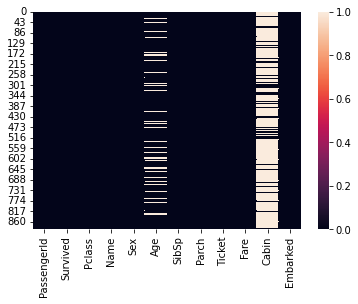

In [68]:
import seaborn as sns
sns.heatmap(titanic.isnull())

In [69]:
# check for passengers whose age data is missing
null_mask = titanic['Embarked'].isnull()
titanic[null_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Data Cleansing

* Correcting the datatype
* Dealing with missing values
 and so on...

### Removing Cabin column

In [70]:
titanic = titanic.drop(labels=["Cabin"], axis=1)

In [71]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Handling missing Age data

In [72]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [73]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Handling Missing Embarked values

In [74]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [76]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Operations

## Aggregate stats

In [78]:
# mean value for each (numeric) columns
titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.361582
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [79]:
titanic['Age'].mean()

29.36158249158249

In [80]:
titanic['Fare'].mean()

32.2042079685746

In [81]:
titanic[['Age','Fare']].mean()

Age     29.361582
Fare    32.204208
dtype: float64

In [82]:
titanic[['Age','Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [83]:
titanic[['Age','Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [84]:
# range of age values
titanic['Age'].max() - titanic['Age'].min()

79.58

In [85]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [86]:
# df.agg
titanic.agg({'Age': ['min','max','median','mean'],
            'Fare': ['min','max','median','mean'] })

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
mean,29.361582,32.204208


## Aggregating Stats grouped by category

**Q1: What is the average age for male vs female passengers Titanic passengers**

In [87]:
titanic[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,27.929936
male,30.140676


In [88]:
titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893


In [89]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [90]:
titanic.groupby(["Pclass","Sex"])["Pclass"].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

In [91]:
# sorting values
titanic.sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0000,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C


In [92]:
titanic.sort_values('Fare',ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C


In [93]:
# counting number of unique values
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [94]:
titanic['Embarked'].nunique()

3

## Changing the data type

In [95]:
titanic['Embarked'].dtypes

dtype('O')

In [96]:
# changing to embarked column to category
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [97]:
titanic['Embarked'].dtypes

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

## Filtering 

In [98]:
# filtering under a single condition
# to see all information of the passengers who embarked from point C
titanic[titanic['Embarked'] == "C"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C


In [99]:
# filtering under multiple conditions
# creating require condition masks 
titanic_fare_mask = titanic['Fare'] < 100
titanic_sex_mask = titanic["Sex"] == 'female'

In [100]:
#to check for female passengers who paid less than 100 fare
titanic[titanic_fare_mask & titanic_sex_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [101]:
titanic[titanic_fare_mask | titanic_sex_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [102]:
titanic[titanic_fare_mask != titanic_sex_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Plotting the titanic dataset using matplotlib and seaborn

In [103]:
import matplotlib.pyplot as plt

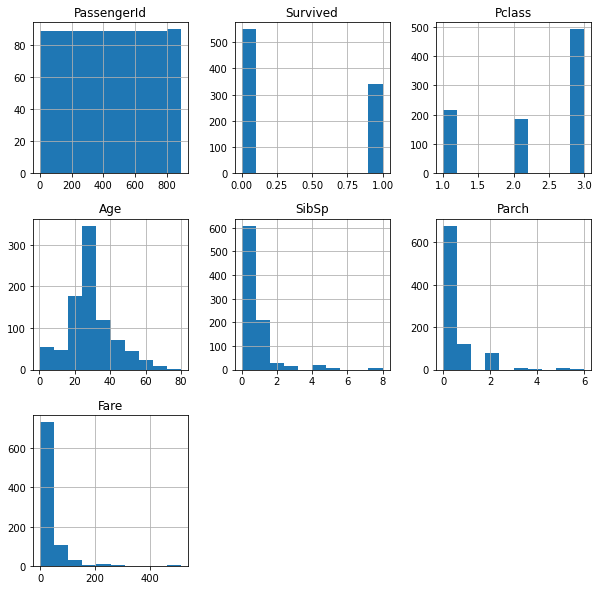

In [104]:
a = titanic.hist(figsize = (10,10))

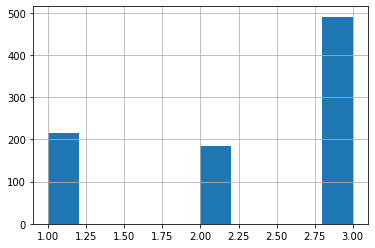

In [105]:
a = titanic['Pclass'].hist()

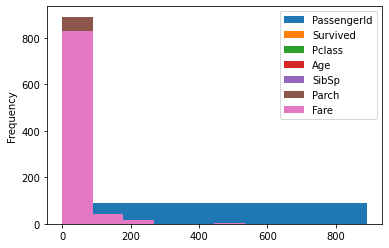

In [106]:
titanic.plot.hist()

## Survival rate Passenger class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69838ae590>,
      dtype=object)

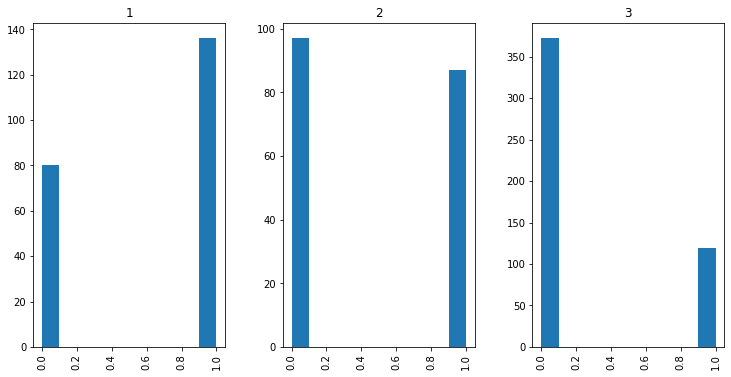

In [107]:
titanic.hist("Survived", by="Pclass", grid="False", figsize=[12,6], layout=[1,3])

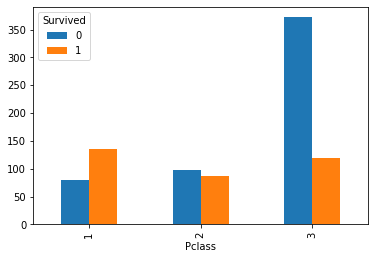

In [108]:
titanic.groupby('Pclass').Survived.value_counts().unstack().plot.bar()

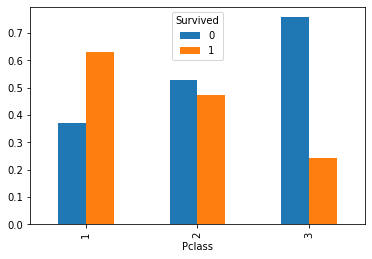

In [109]:
df.groupby('Pclass').Survived.value_counts(normalize=True).unstack().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f698631fc50>,
      dtype=object)

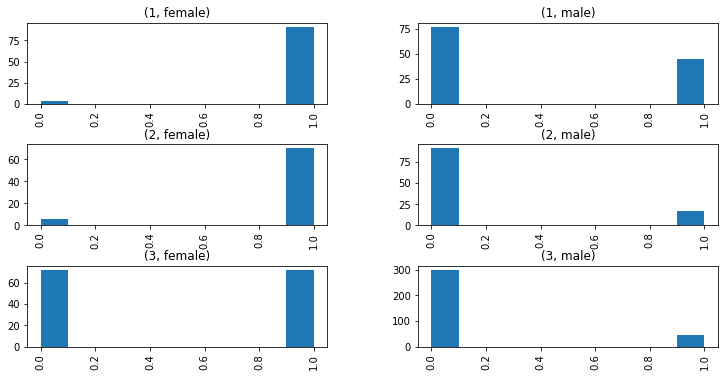

In [110]:
titanic.hist("Survived", by=["Pclass",'Sex'], grid="False", figsize=[12,6], layout=[3,2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6984a8f850>,
      dtype=object)

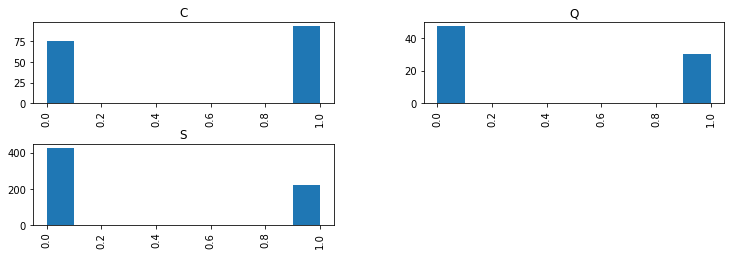

In [111]:
#survival by embarkment type
titanic.hist('Survived', by='Embarked',figsize=[12,6], layout=[3,2])

# Based on this we can go in direction that since people from class 3 survived less so based the below chart we can say may be most
# of class 3 passengers embarked from Q or S.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69834fa1d0>,
      dtype=object)

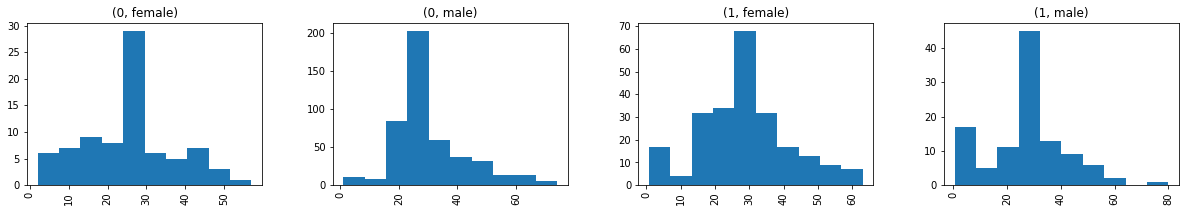

In [112]:
titanic.hist('Age', bins=10, by=['Survived','Sex'], layout=[1,4], figsize=[20,3])

In [113]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


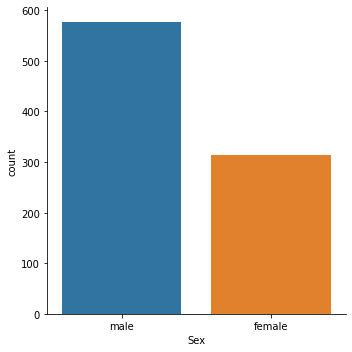

In [114]:
sns.catplot('Sex',data=titanic, kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


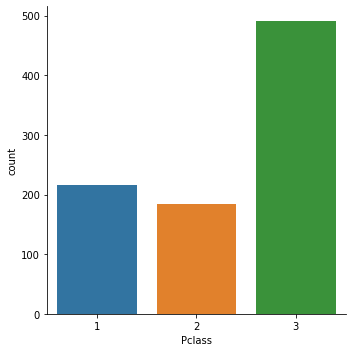

In [115]:
sns.catplot('Pclass',data=titanic, kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


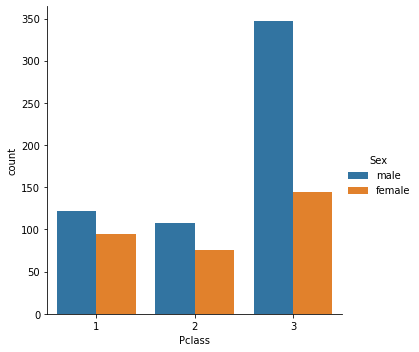

In [116]:
sns.catplot('Pclass',data=titanic, hue='Sex', kind='count') 
# hue is used to group by, in this case grouping by Sex per class of passsengers